In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:
# replace with the actual CSV file path or URL
df = pd.read_csv('data/bug-severity-raw.csv')
df.head()

,ticket_id,submitted_at,product_area,customer_type,priority,reporter_experience,reproduction_steps,num_attachments,description_length,affected_users_count,prev_similar_tickets,module_version,ticket_type,auto_tag_count,sla_breached,assigned_team,severity,resolved_at
0,TCKT-100000,9/29/2023 13:35,Auth,Internal,Medium,Senior,True,1,574.0,13.0,0.0,5.2.11,Bug,5,No,QA,Medium,9/30/2023 19:35
1,TCKT-100001,3/5/2025 6:23,DevOps,Internal,High,Junior,True,0,299.0,16.0,2.0,4.2.4,Question,3,Yes,Dev,Medium,3/6/2025 16:23
2,TCKT-100002,7/25/2023 18:40,ML,SMB,Low,Junior,False,2,526.0,13.0,0.0,3.2.11,Bug,1,No,QA,Low,7/27/2023 2:40
3,TCKT-100003,10/18/2023 22:03,Auth,Free-tier,Low,Mid,True,2,734.0,7.0,0.0,4.8.4,Bug,2,No,QA,Low,10/20/2023 3:03
4,TCKT-100004,6/27/2025 0:35,Backend,Enterprise,medium,Mid,True,1,374.0,7.0,3.0,2.9.15,Bug,3,No,Security,Medium,6/27/2025 7:35


In [34]:
df.tail()

,ticket_id,submitted_at,product_area,customer_type,priority,reporter_experience,reproduction_steps,num_attachments,description_length,affected_users_count,prev_similar_tickets,module_version,ticket_type,auto_tag_count,sla_breached,assigned_team,severity,resolved_at
4995,TCKT-104995,2/16/2025 8:50,ML,Enterprise,Urgent,Mid,False,2,340.0,8.0,1.0,2.1.18,Bug,2,Yes,QA,Critical,2/16/2025 15:50
4996,TCKT-104996,6/14/2023 2:15,Database,Enterprise,Medium,Mid,False,0,682.0,9.0,1.0,4.2.10,Crash,2,No,Support,High,6/14/2023 13:15
4997,TCKT-104997,5/26/2025 20:52,Backend,Internal,Medium,Mid,False,1,779.0,10.0,1.0,3.7.19,Performance,1,No,Security,Low,5/28/2025 17:52
4998,TCKT-104998,3/15/2024 14:56,API,Enterprise,High,Mid,False,1,361.0,9.0,1.0,2.7.7,Bug,3,No,QA,Medium,3/15/2024 22:56
4999,TCKT-104999,5/27/2023 18:11,DevOps,SMB,High,Senior,True,2,544.0,16.0,1.0,5.9.18,Bug,3,Yes,Security,High,5/28/2023 4:11


In [35]:
df.shape

(5000, 18)

### Data checks

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticket_id             5000 non-null   object 
 1   submitted_at          5000 non-null   object 
 2   product_area          5000 non-null   object 
 3   customer_type         5000 non-null   object 
 4   priority              5000 non-null   object 
 5   reporter_experience   5000 non-null   object 
 6   reproduction_steps    5000 non-null   bool   
 7   num_attachments       5000 non-null   int64  
 8   description_length    4750 non-null   float64
 9   affected_users_count  4752 non-null   float64
 10  prev_similar_tickets  4750 non-null   float64
 11  module_version        5000 non-null   object 
 12  ticket_type           5000 non-null   object 
 13  auto_tag_count        5000 non-null   int64  
 14  sla_breached          5000 non-null   object 
 15  assigned_team        

In [37]:
df.describe()

,num_attachments,description_length,affected_users_count,prev_similar_tickets,auto_tag_count
count,5000.000000,4750.000000,4752.000000,4750.000000,5000.000000
mean,1.520600,597.528421,42.457912,1.003158,1.981800
std,3.494742,151.379318,335.242381,0.985786,1.416429
min,0.000000,70.000000,1.000000,0.000000,0.000000
25%,0.000000,494.000000,8.000000,0.000000,1.000000
50%,1.000000,597.000000,10.000000,1.000000,2.000000
75%,2.000000,702.000000,12.000000,2.000000,3.000000
max,48.000000,1153.000000,4932.000000,6.000000,10.000000


In [49]:
df.duplicated().sum()

np.int64(0)

In [7]:
# check for missing values
df.isnull().sum()

ticket_id                 0
submitted_at              0
product_area              0
customer_type             0
priority                  0
reporter_experience       0
reproduction_steps        0
num_attachments           0
description_length      250
affected_users_count    248
prev_similar_tickets    250
module_version            0
ticket_type               0
auto_tag_count            0
sla_breached              0
assigned_team             0
severity                  0
resolved_at               0
dtype: int64

In [38]:
# Fix missing values through statistical imputation
df['description_length']=df['description_length'].fillna(df['description_length'].median())
df['affected_users_count']=df['affected_users_count'].fillna(df['affected_users_count'].mean())
df['prev_similar_tickets']=df['prev_similar_tickets'].fillna(0)

In [50]:
df.nunique()

ticket_id               5000
submitted_at            4989
product_area               8
customer_type              4
priority                   4
reporter_experience        3
reproduction_steps         2
num_attachments           34
description_length       740
affected_users_count      73
prev_similar_tickets       7
module_version           997
ticket_type                5
auto_tag_count            10
sla_breached               2
assigned_team              5
severity                   4
resolved_at             4991
day_of_week                7
hour_of_day               24
month_year                30
days_to_resolve            3
dtype: int64

In [52]:
# Identify all text features to check for unique values
text_features = df.select_dtypes(include=['object']).columns

# Loop and print unique values for each text feature
for col in text_features:
    print(f"--- Unique values in {col} ---")
    print(df[col].unique())
    print("\n")

--- Unique values in ticket_id ---
['Tckt-100000' 'Tckt-100001' 'Tckt-100002' ... 'Tckt-104997' 'Tckt-104998'
 'Tckt-104999']


--- Unique values in product_area ---
['Auth' 'Devops' 'Ml' 'Backend' 'Security' 'Api' 'Database' 'Ui']


--- Unique values in customer_type ---
['Internal' 'Smb' 'Free-Tier' 'Enterprise']


--- Unique values in priority ---
['Medium' 'High' 'Low' 'Urgent']


--- Unique values in reporter_experience ---
['Senior' 'Junior' 'Mid']


--- Unique values in module_version ---
['5.2.11' '4.2.4' '3.2.11' '4.8.4' '2.9.15' '5.3.14' '2.5.5' '2.3.14'
 '5.8.4' '1.5.13' '5.1.13' '3.2.12' '5.8.0' '3.9.7' '5.2.2' '2.2.17'
 '3.1.7' '4.4.13' '3.7.19' '1.0.11' '5.6.9' '3.7.2' '3.0.4' '1.1.17'
 '4.9.1' '5.9.2' '1.8.3' '5.3.16' '4.3.11' '3.3.4' '3.5.8' '3.1.9'
 '5.6.14' '2.9.10' '5.7.7' '2.6.11' '4.1.17' '3.2.2' '1.5.15' '4.4.16'
 '5.5.11' '4.3.8' '4.9.7' '3.8.12' '5.2.17' '1.0.8' '2.8.11' '2.7.3'
 '4.9.14' '2.7.15' '2.9.14' '4.2.9' '4.4.1' '2.8.18' '2.9.0' '5.5.2'
 '5.1.9' '1.6.1

In [53]:
# Apply title case formatting to categorical text features
for col in text_features:
    df[col] = df[col].str.strip().str.title()  

In [55]:
# Convert dates to datetime format
df['submitted_at']=pd.to_datetime(df['submitted_at'])
df['resolved_at']=pd.to_datetime(df['resolved_at'])

# Extract useful features from datetime columns
df['day_of_week']=df['submitted_at'].dt.day_name()
df['hour_of_day']=df['submitted_at'].dt.hour
df['month_year']=df['submitted_at'].dt.to_period('M').astype(str)
df['days_to_resolve']=(df['resolved_at'] - df['submitted_at']).dt.days

In [59]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['reproduction_steps', 'num_attachments', 'description_length', 'affected_users_count', 'prev_similar_tickets', 'auto_tag_count', 'hour_of_day', 'days_to_resolve']

We have 11 categorical features : ['product_area', 'customer_type', 'priority', 'reporter_experience', 'module_version', 'ticket_type', 'sla_breached', 'assigned_team', 'severity', 'day_of_week', 'month_year']


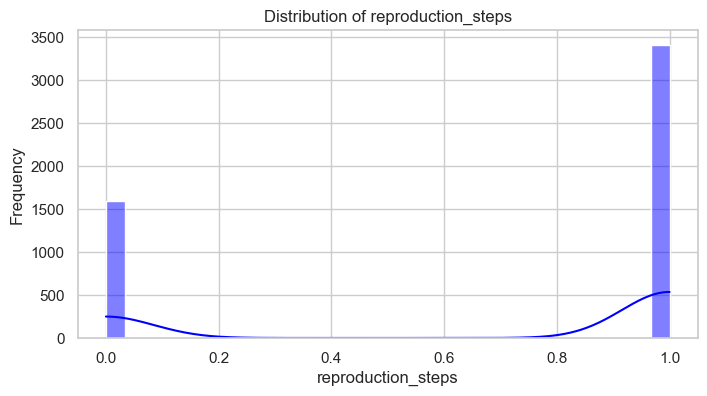

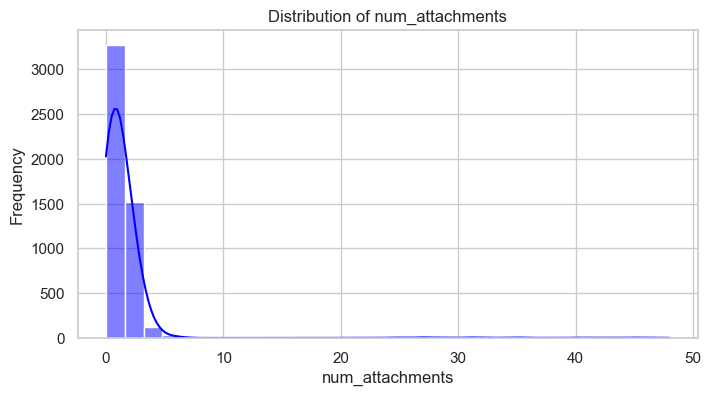

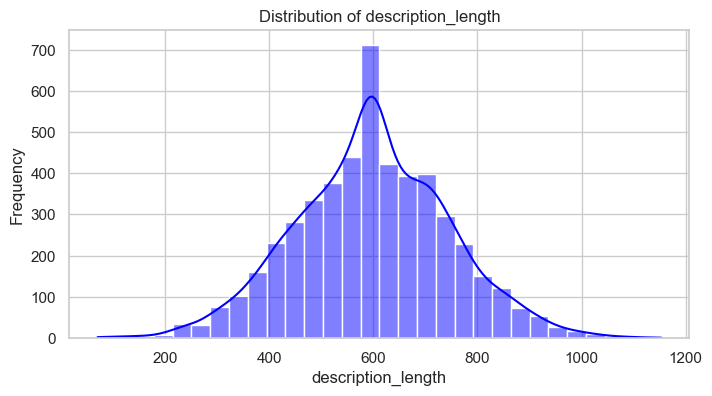

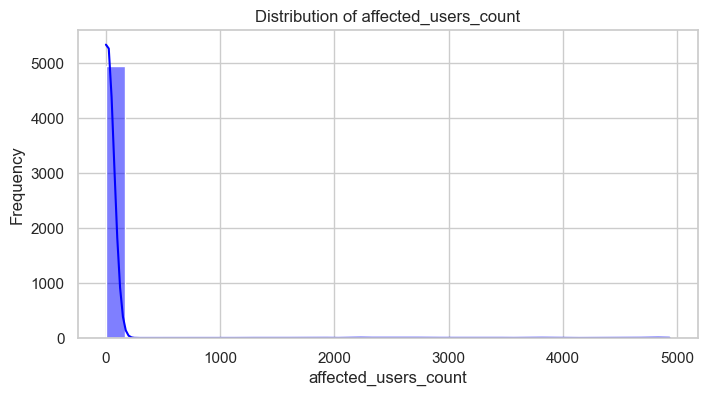

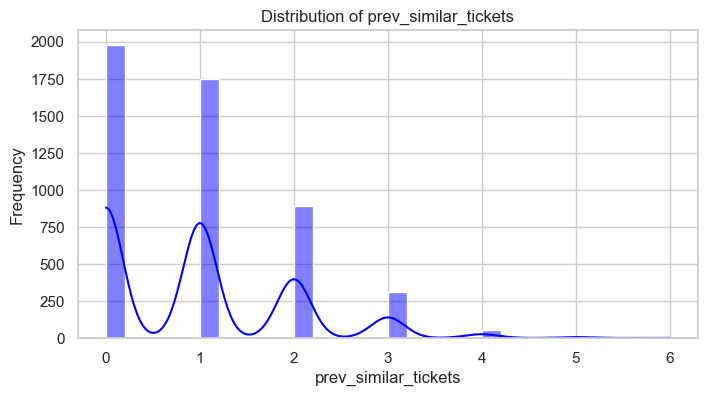

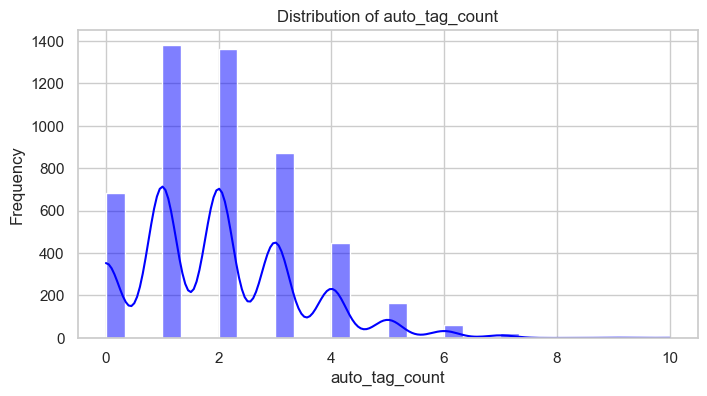

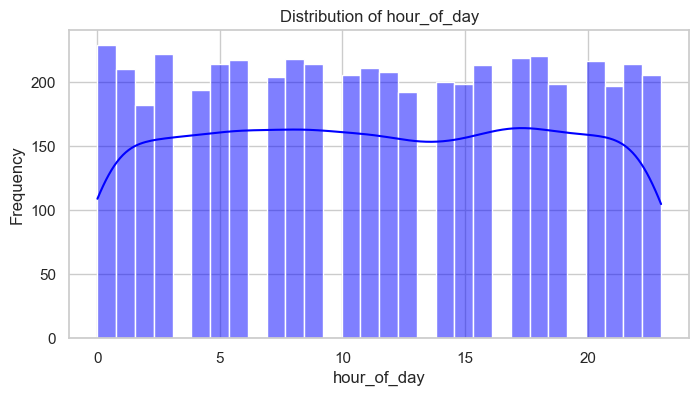

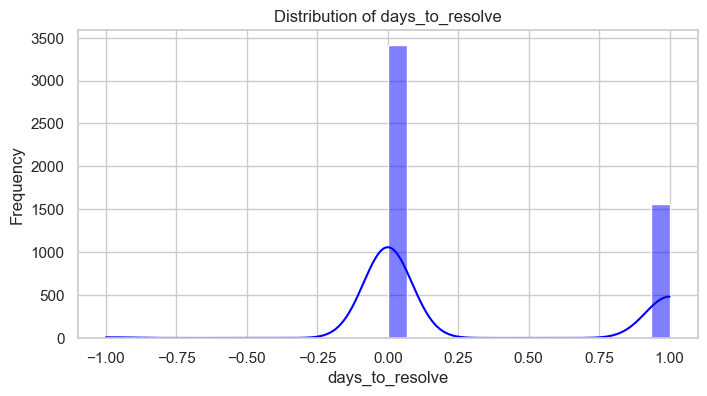

In [63]:
# Histogram to visualize the distribution of numerical features 
for col in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

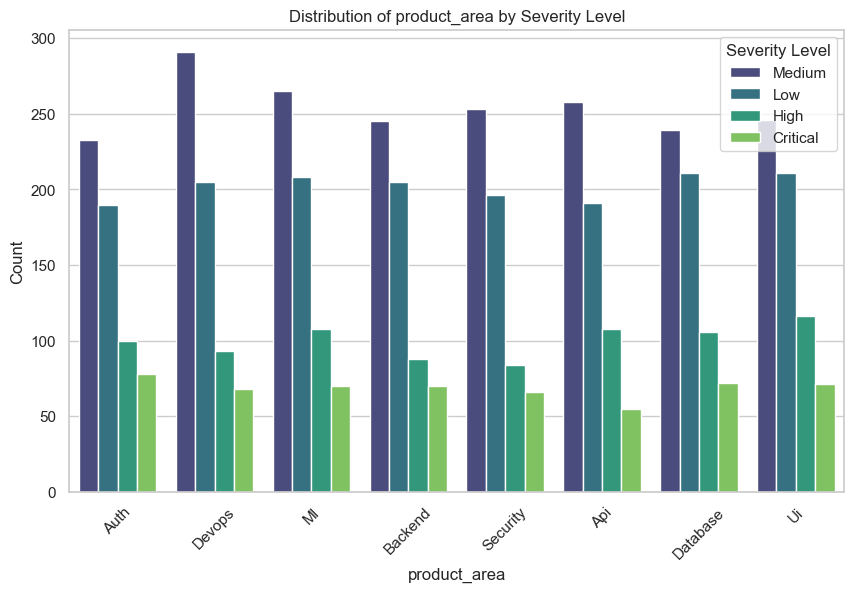

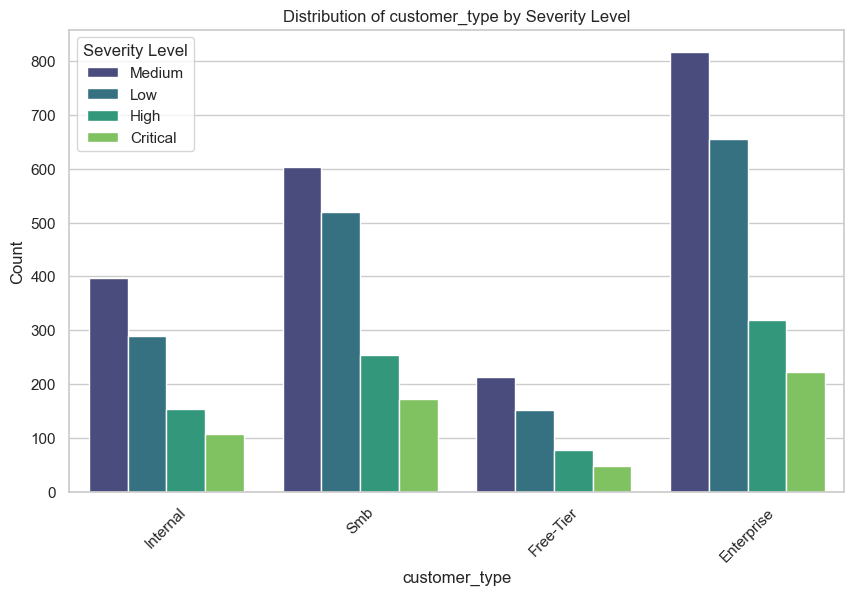

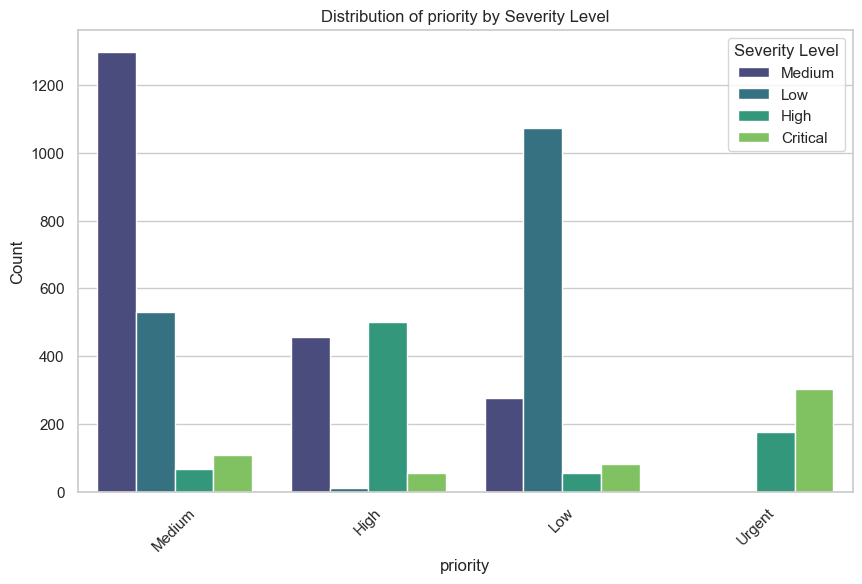

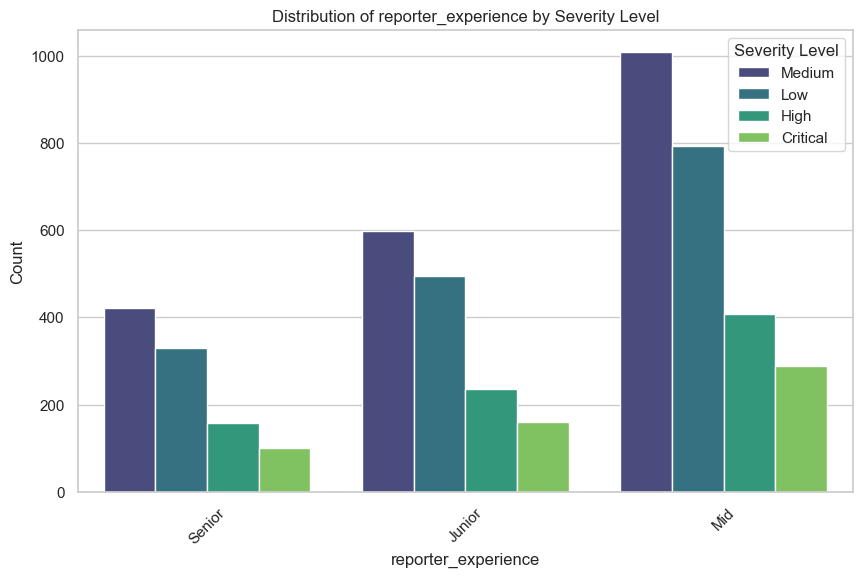

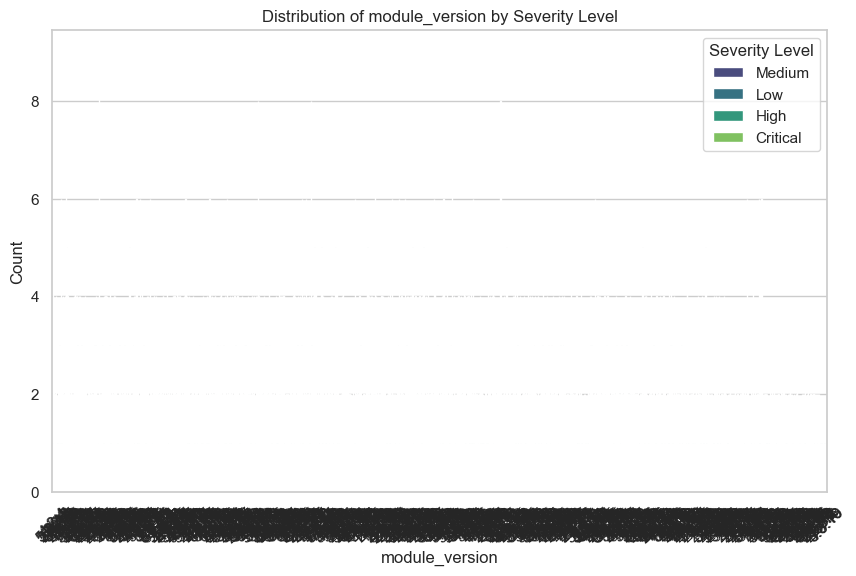

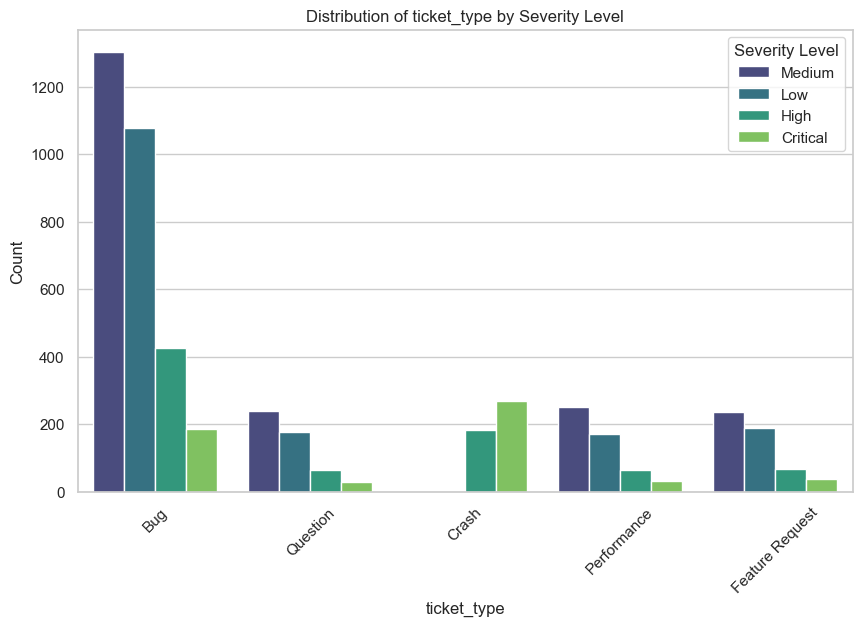

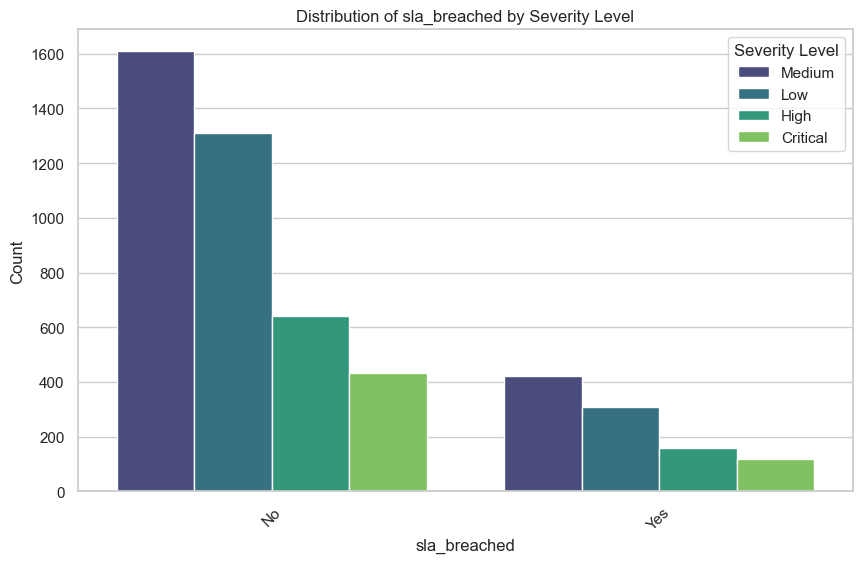

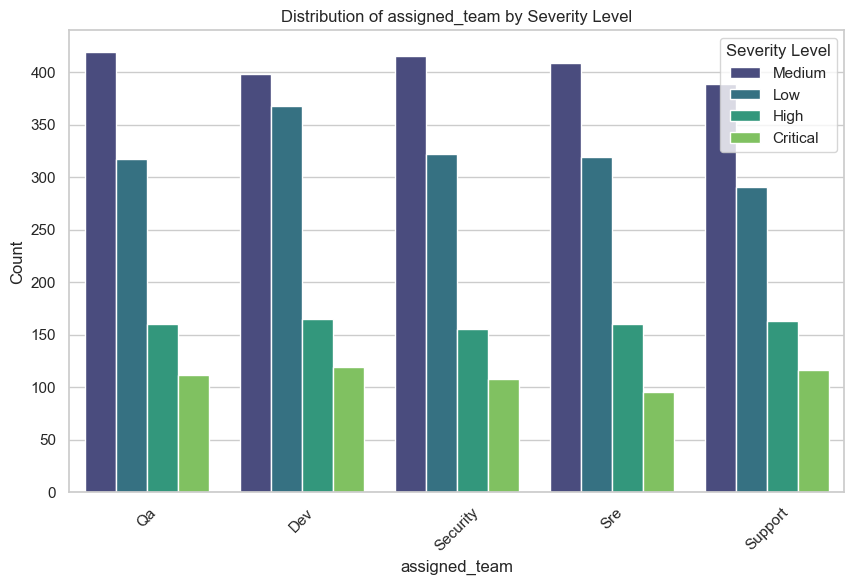

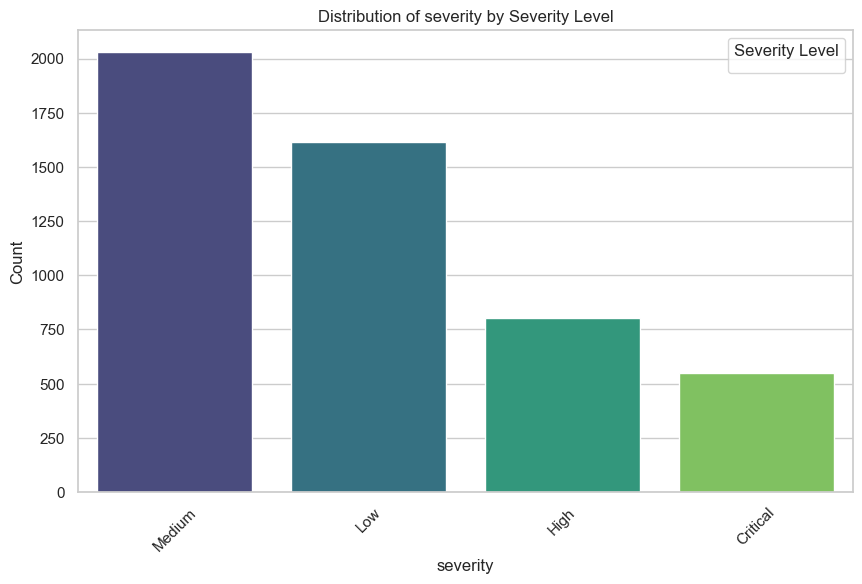

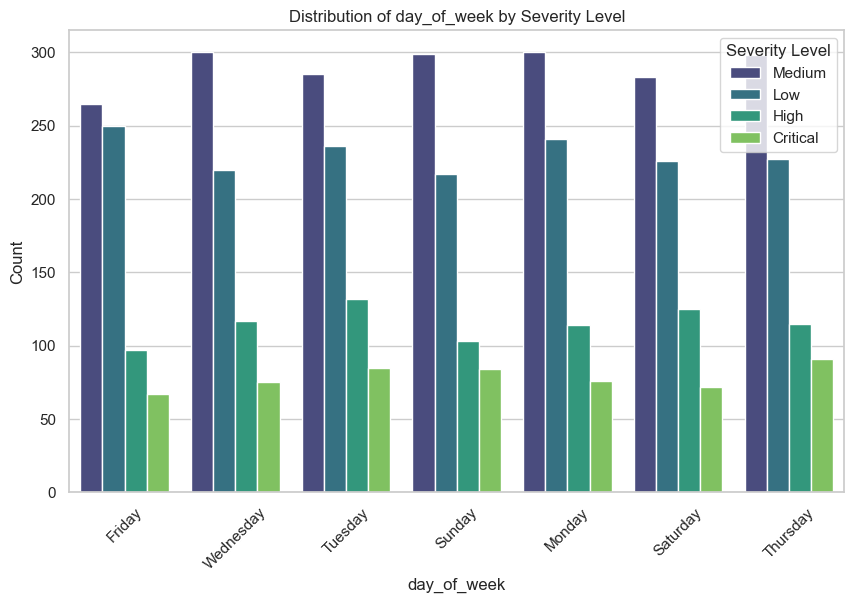

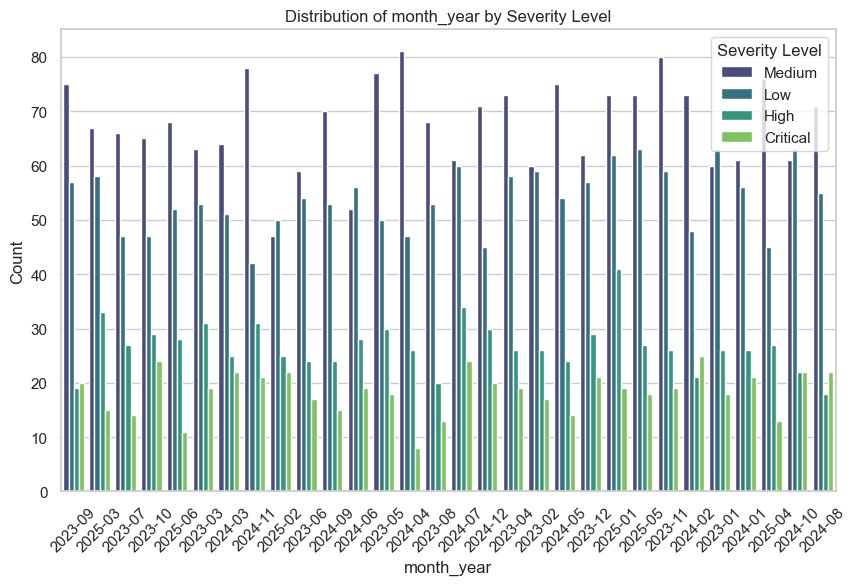

In [61]:
# Bar plot for categorical features vs severity
for col in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=col, hue='severity', palette='viridis')
    plt.title(f'Distribution of {col} by Severity Level')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Severity Level')
    plt.xticks(rotation=45)
    plt.show()

<Axes: xlabel='severity', ylabel='description_length'>

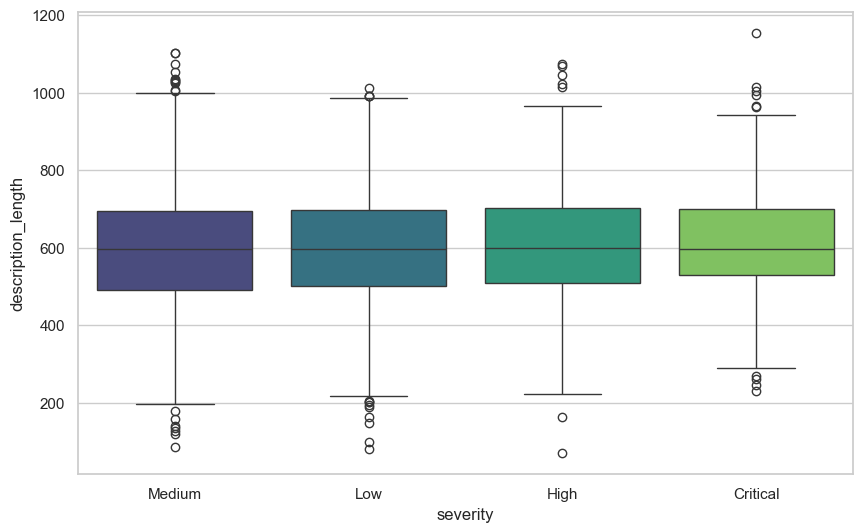

In [25]:
# Check for the relationship between description in length and severity
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='severity', y='description_length', palette="viridis")

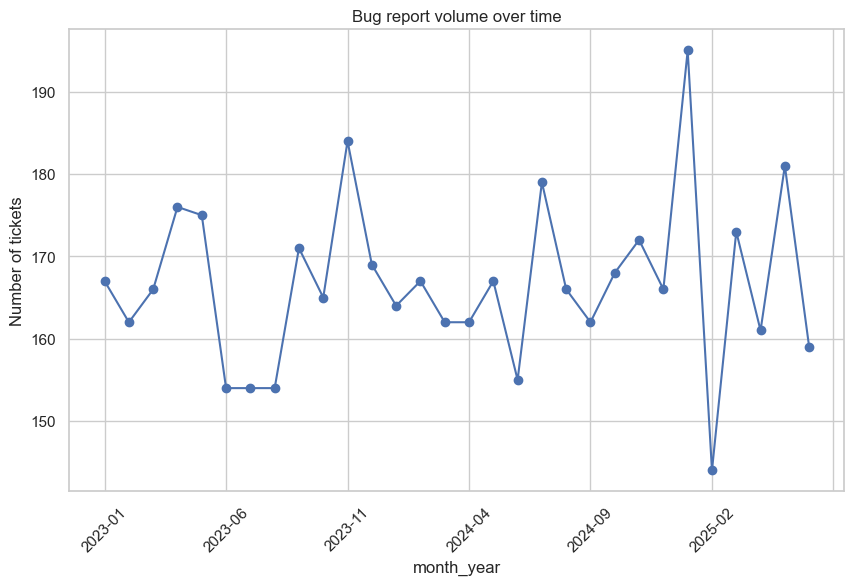

In [26]:
# Visualizing bug report volume over time
plt.figure(figsize=(10,6))
df.groupby('month_year').size().plot(kind='line',marker='o')
plt.title('Bug report volume over time')
plt.xticks(rotation=45)
plt.ylabel('Number of tickets')
plt.show()

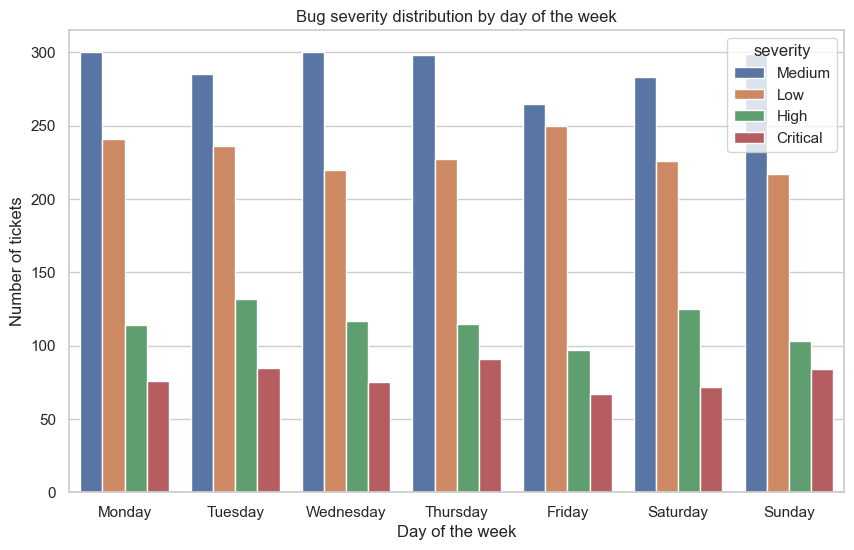

In [27]:
# Day of the week analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='day_of_week', order=day_order, hue='severity')
plt.title('Bug severity distribution by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of tickets')
plt.show()

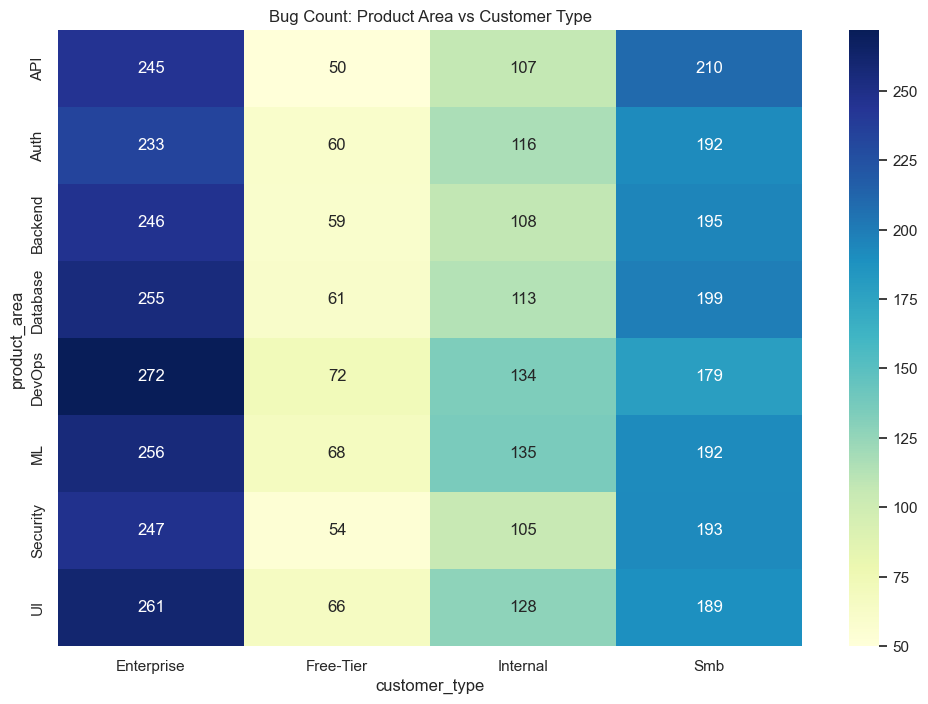

In [29]:
# Product heatmap visualization
ct = pd.crosstab(df['product_area'], df['customer_type'])
plt.figure(figsize=(12,8))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Bug Count: Product Area vs Customer Type')
plt.show()